In [ ]:
# to install solver
#!pip install pyomo
#!apt-get install -y -qq glpk-utils

     |████████████████████████████████| 9.6 MB 4.5 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155501 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up 

In [ ]:
# python-based open source optimization modelling language
import pyomo.environ as pyo 
from pyomo.opt import SolverFactory

### Problem 1

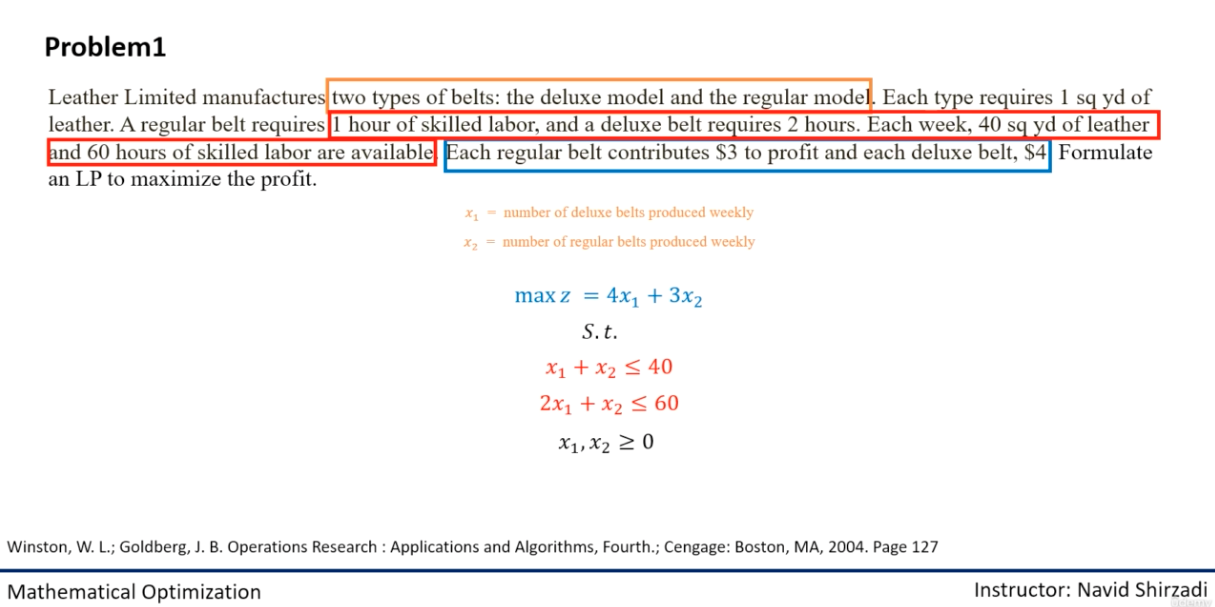

In [ ]:
# Defining the model
model = pyo.ConcreteModel()

# Decision Variables
model.x1 = pyo.Var(within = pyo.NonNegativeReals)
x1 = model.x1
model.x2 = pyo.Var(within = pyo.NonNegativeReals)
x2 = model.x2


# Objective Function
model.Obj = pyo.Objective(expr = 4*x1+3*x2, sense = pyo.maximize)


# Constraints
model.Const1 = pyo.Constraint(expr =  x1+x2<=40)
model.Const2 = pyo.Constraint(expr = 2*x1+x2<=60)

optm = SolverFactory('glpk')
results = optm.solve(model)

print(results)
print('objective function ', model.Obj())
print('x1 = ', model.x1())
print('x2 = ', model.x2())


Problem: 
- Name: unknown
  Lower bound: 140.0
  Upper bound: 140.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0169217586517334
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

objective function  140.0
x1 =  20.0
x2 =  20.0


### Problem 2

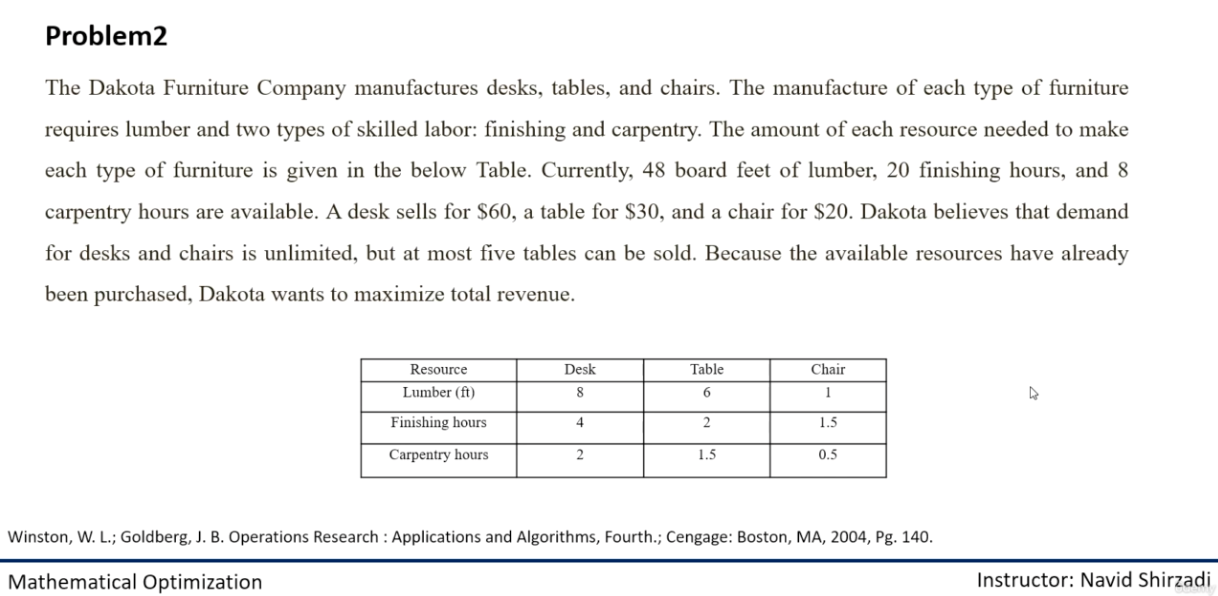

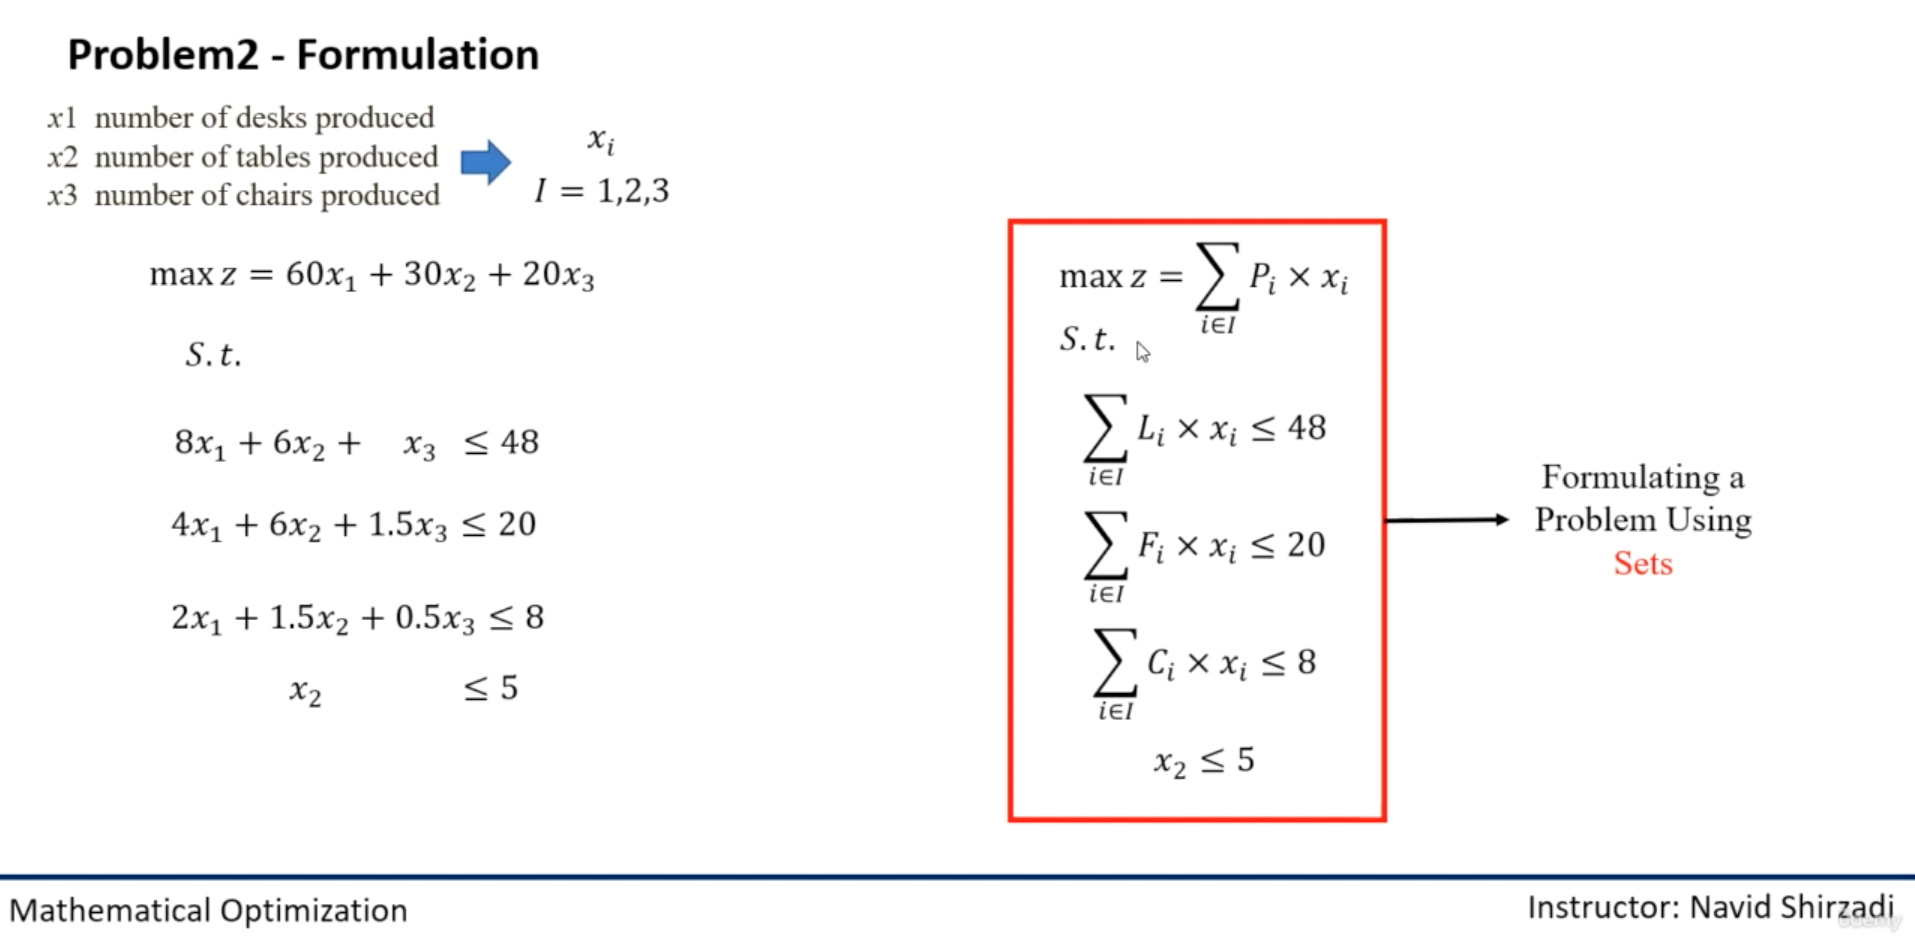

In [13]:
from pyomo.core.base.constraint import Constraint
model = pyo.ConcreteModel()

# Sets
model.i = pyo.Set(initialize = ['Desk', 'Table', 'Chair'])

# Parameters 
model.L = pyo.Param(model.i, initialize = {'Desk':8, 'Table':6, 'Chair':1})
L = model.L

model.F = pyo.Param(model.i, initialize = {'Desk':4, 'Table':2, 'Chair':1.5})
F = model.F

model.C = pyo.Param(model.i, initialize = {'Desk':2, 'Table':1.5, 'Chair':0.5})
C = model.C

model.P = pyo.Param(model.i, initialize = {'Desk': 60, 'Table':30, 'Chair':20})
P = model.P

# Decision Variables
model.x = pyo.Var(model.i, within = pyo.NonNegativeReals)
x = model.x

# Objective Function
def Objective_rule(model):
  return sum(P[i]*x[i] for i in model.i)

model.Obj = pyo.Objective(rule = Objective_rule, sense = pyo.maximize)

# Constraints
def Constraint1(model, i):
  return sum(L[i]*x[i] for i in model.i)<=48

model.Const1 = pyo.Constraint(model.i, rule = Constraint1)

def Constraint2(model, i):
  return sum(F[i]*x[i] for i in model.i)<=20

model.Const2 = pyo.Constraint(model.i, rule = Constraint2)

def Constraint3(model, i):
  return sum(C[i]*x[i] for i in model.i)<=8

model.Const3 = pyo.Constraint(model.i, rule = Constraint3)

def Constraint4(model, i):
  return x['Table']<=5

# Solve
Solver = SolverFactory('glpk')
results = Solver.solve(model)

print(results)
print('Objective Function = ', model.Obj())

for i in model.i:
  print('Number of',i, 'produced = ', x[i]())


Problem: 
- Name: unknown
  Lower bound: 280.0
  Upper bound: 280.0
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 4
  Number of nonzeros: 28
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.01699352264404297
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective Function =  280.0
Number of Desk produced =  2.0
Number of Table produced =  0.0
Number of Chair produced =  8.0


### Challange Problem

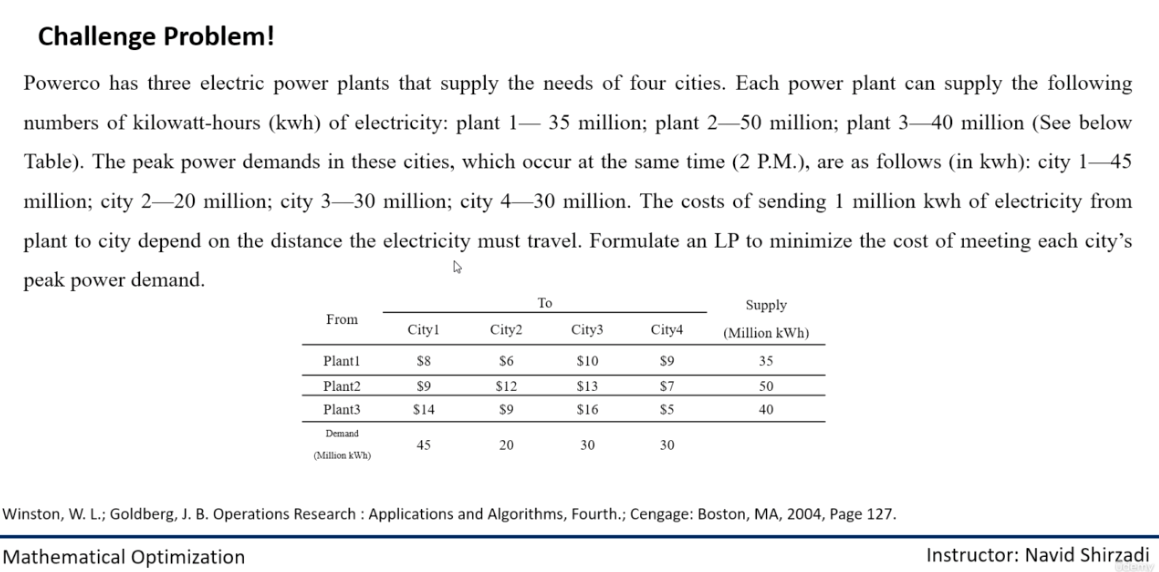

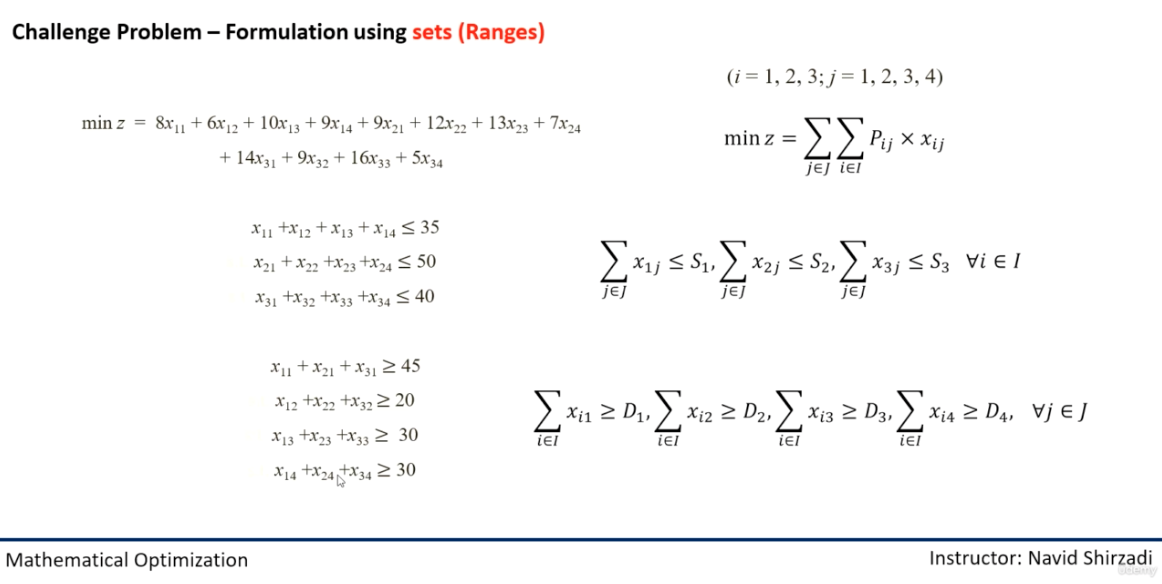

In [18]:
model = pyo.ConcreteModel()

# Sets
model.i = pyo.RangeSet(1,3)
model.j = pyo.RangeSet(1,4)

"""
model.i = pyo.Set('Plant1', 'Plant', 'Plant3')
model.j = pyo.Set('City1', 'City2', 'City3', 'City4')
"""

# Parameters
model.S = pyo.Param(model.i, initialize = {1:35, 2:50, 3:40})
S = model.S

model.D = pyo.Param(model.j, initialize = {1:45, 2:20, 3:30, 4:30})
D = model.D

model.P = pyo.Param(model.i, model.j, initialize = {(1,1):8, (1,2):6, (1,3):10, (1,4):9,
                                                    (2,1):9, (2,2):12, (2,3):13, (2,4):7,
                                                    (3,1):14, (3,2):9, (3,3):16, (3,4):5})
P = model.P

# Variables
model.x = pyo.Var(model.i, model.j, within = pyo.NonNegativeReals)
x = model.x

# Objective Function
def Objective_rule(model):
  return sum(sum(P[i,j]*x[i,j] for i in model.i) for j in model.j)

model.Objf = pyo.Objective(rule = Objective_rule, sense = pyo.minimize)

# Constraints
def Constraint1(model, i):
  return sum(x[1,j] for j in model.j)<=S[1]
model.Const1 = pyo.Constraint(model.j, rule = Constraint1)

def Constraint2(model, i):
  return sum(x[2,j] for j in model.j)<=S[2]
model.Const2 = pyo.Constraint(model.j, rule = Constraint2)

def Constraint3(model, i):
  return sum(x[3,j] for j in model.j)<=S[3]
model.Const3 = pyo.Constraint(model.j, rule = Constraint3)

def Constraint4(model, j):
  return sum(x[i,1] for i in model.i)>=D[1]
model.Const4 = pyo.Constraint(model.i, rule = Constraint4)

def Constraint5(model, j):
  return sum(x[i,2] for i in model.i)>=D[2]
model.Const5 = pyo.Constraint(model.i, rule = Constraint5)

def Constraint6(model, j):
  return sum(x[i,3] for i in model.i)>=D[3]
model.Const6 = pyo.Constraint(model.i, rule = Constraint6)

def Constraint7(model, j):
  return sum(x[i,4] for i in model.i)>=D[4]
model.Const7 = pyo.Constraint(model.i, rule = Constraint7)

# Solve the problem
Solver = SolverFactory('glpk')
results = Solver.solve(model)

print(results)
print('Objective Functions = ', model.Objf())

for i in model.i:
  for j in model.j:
    print('Electricity send from Plant', i, 'to City', j, '=', x[i,j]())


Problem: 
- Name: unknown
  Lower bound: 1020.0
  Upper bound: 1020.0
  Number of objectives: 1
  Number of constraints: 25
  Number of variables: 13
  Number of nonzeros: 85
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.017618656158447266
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective Functions =  1020.0
Electricity send from Plant 1 to City 1 = 0.0
Electricity send from Plant 1 to City 2 = 10.0
Electricity send from Plant 1 to City 3 = 25.0
Electricity send from Plant 1 to City 4 = 0.0
Electricity send from Plant 2 to City 1 = 45.0
Electricity send from Plant 2 to City 2 = 0.0
Electricity send from Plant 2 to City 3 = 5.0
Electricity send from Plant 2 to City 4 = 0.0
Electricity send from Plant 3 to City 1 = 0.0
Electricity send from Plant 3 to City 2 = 10.0
Electricity send from Plan